# Example Python Workflow to process South Padre Currents Data
In this Jupyter Notebook, I outline the general process for loading the ADCP data from the South Padre Island sediment study. 

## Source Data:##
Engel, F.L., Hartmann, C.A., Petri, B.L., Bryan, P.W., Ockerman, D.J., and Schnoebelen, D.J., 2020, Oceanographic Observations made near South Padre Island, Texas, as Part of the South Padre Island Beach Replenishment Project; August 2018–February 2019: U.S. Geological Survey data release, https://doi.org/10.5066/P9HDIZOC.

## Abstract ##
Beaches and water recreation are important to the South Padre Island, Texas area and across the United States. The movement of sediment in channels along beaches and the nearshore environment is important for coastal stakeholders and resource managers. Sediment removed by maintenance dredging is often placed back into the littoral system for potential beach replenishment. The movement of sediment from offshore berms to onshore beaches is not well known. Sediment transport is highly dependent on local current conditions and seasonal conditions. The U.S. Geological Survey, in cooperation with the City of South Padre Island, completed an oceanographic field study from August 2018 to February 2019 to investigate the potential for beach replenishment by associated dredge material placed just offshore of South Padre Island, Texas. This data release documents that data that were collected during the study.

## Purpose ##
This dataset provides the data  that were obtained during an oceanographic field study from August 2018 to February 2019 to investigate the potential for beach replenishment by associated dredge material placed just offshore of South Padre Island, Texas. A Teledyne Oceanscience Barnacle53 trawl-resistant frame-mounted acoustic Doppler current profiler (ADCP) was deployed to the seabed approximated 1-mile (1.61-kilometers) offshore, east of the coast line. The ADCP was deployed to measure surface waves, pressure, and current velocity. The measurements will be used to explore the oceanographic and sediment-transport processes responsible for the movement and distribution of sand  along under-water ridges (shoals) that runs parallel to the shore near South Padre Island, Texas. The background and experimental setup are described in the extended abstract "Monitoring Hydroacoustic Flow and Tracers of Offshore Dredge Material near South Padre Island,
Texas", on line at: https://www.sedhyd.org/2019/openconf/modules/request.php?module=oc_program&amp;action=view.php&amp;id=244&amp;file=1/244.pdf.
More information about the Baracle53 mount can be found on line at: http://www.teledynemarine.com/Lists/Downloads/seafloor_platforms_specsheet.pdf

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy
from math import pi
from windrose import WindroseAxes
from datetime import datetime

d:\virtual-environments\south-padre-island\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
d:\virtual-environments\south-padre-island\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
d:\virtual-environments\south-padre-island\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
d:\virtual-environments\south-padre-island\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was depre

# Load currents data from barnacle data

This is for all the data we have for the banacle. 
- Start date and time: Aug 13, 2018 13:03
- End date and time: Feb 11, 2019 23:40


The easiest way to load the data is to use Pandas and create a dataframe. When doing this, we have to do a little massaging to get the data columns to "identify" as a proper date-time. The code to do this looks like:

In [2]:
# Load raw data, create a datetime column, index it, then drop the seperate Y,M,D,H,min,sec
df = pd.read_csv('whV0001.currents.20180813.20180322.csv')
df.rename(columns={'Min':'Minute'}, inplace=True)
df.rename(columns={'Sec':'Second'}, inplace=True)
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
df = df.set_index('Datetime')
df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], axis=1, inplace=True)
df.head(5)  # display first few rows

,Num,Pitch,Roll,Heading,Temperature,Pressure,SensorDepth,WaterSpeedCell1_0.84m,WaterSpeedCell2_1.14m,WaterSpeedCell3_1.44m,...,CorrelationAvgCell31_9.84m,CorrelationAvgCell32_10.14m,CorrelationAvgCell33_10.44m,CorrelationAvgCell34_10.74m,CorrelationAvgCell35_11.04m,CorrelationAvgCell36_11.34m,CorrelationAvgCell37_11.64m,CorrelationAvgCell38_11.94m,CorrelationAvgCell39_12.24m,CorrelationAvgCell40_12.54m
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-13 13:43:03,5,0.45,2.36,308.78,26.38,90.134,8.98,0.048,0.044,0.079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-13 13:53:03,6,0.20,2.21,308.93,25.58,90.221,8.98,0.067,0.043,0.069,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-13 14:03:03,7,-0.16,2.11,307.12,24.92,90.443,9.01,0.060,0.057,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-13 14:13:03,8,-0.26,2.09,307.09,24.63,90.654,9.03,0.058,0.062,0.060,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-13 14:23:03,9,-0.37,2.02,306.96,24.47,90.768,9.04,0.071,0.063,0.062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting some current data
Now, we can pretty much plot whatever we need. For example, to create a two axis plot of current speed and direction for the near-bed most cell, you can do the following (I've included an example about how to highlight a storm as well):

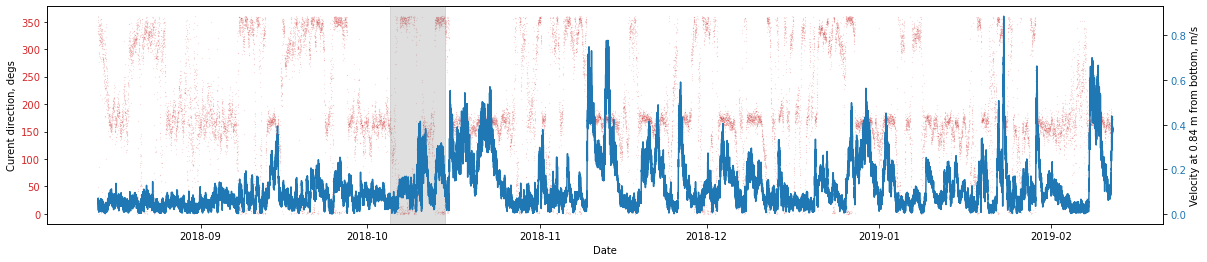

In [3]:
fig, ax1 = plt.subplots(figsize=(20, 4))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Curent direction, degs')
ax1.plot(df[['WaterDirectionCell1_0.84m']], color=color, linestyle='none', marker='.', markersize=0.1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Velocity at 0.84 m from bottom, m/s') # we already handled the x-label with ax1
ax2.plot(df[['WaterSpeedCell1_0.84m']], color=color) 
ax2.tick_params(axis='y', labelcolor=color)



# Highlight the storm event plotted below
plt.axvspan(datetime(2018,10,5), datetime(2018,10,15), color='gray', alpha=0.25)

You can do some data maniputlation in line as well. Say for example, that you would prefer to average the bottom 3 cells and plot the same:

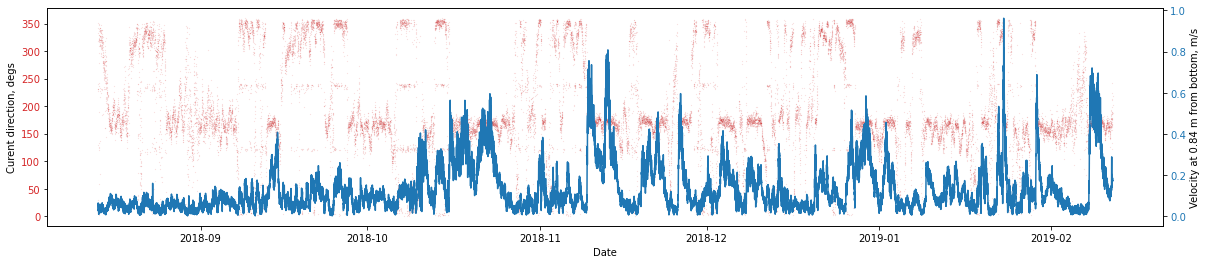

In [4]:
fig, ax1 = plt.subplots(figsize=(20, 4))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Curent direction, degs')
ax1.plot(df[['WaterDirectionCell1_0.84m', 'WaterDirectionCell2_1.14m', 'WaterDirectionCell3_1.44m']].mean(axis=1), color=color, linestyle='none', marker='.', markersize=0.1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Velocity at 0.84 m from bottom, m/s') # we already handled the x-label with ax1
ax2.plot(df[['WaterSpeedCell1_0.84m', 'WaterSpeedCell2_1.14m', 'WaterSpeedCell3_1.44m']].mean(axis=1), color=color) 
ax2.tick_params(axis='y', labelcolor=color)

Or, perhaps you may wish to average the data by time. Here's an easy way to use a moving average feature to do this. The ADCP currents data are reported at 10-minute intervals. So, if we wish to show a daily average, we could set a rolling average window size of 144 (there are 1440 minutes per day, so 144 observations/rows would correcspond to 1 day). This is a quick way to make a "cleaner" plot reflecting daily trends:

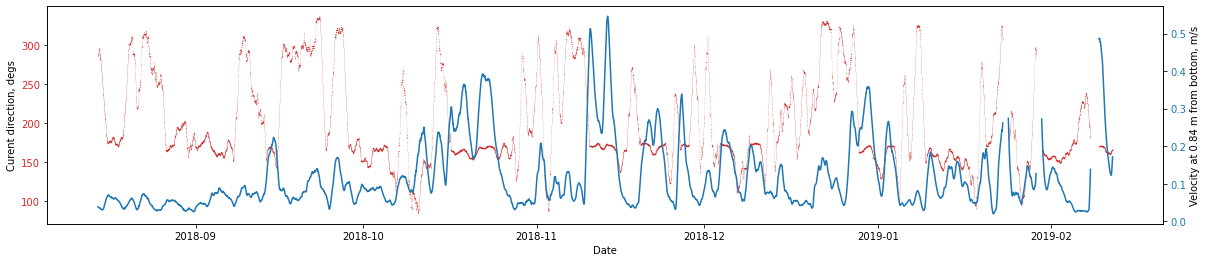

In [5]:
win = 144 # NUM of window observations per rolling avg, has units of column

fig, ax1 = plt.subplots(figsize=(20, 4))
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Curent direction, degs')
ax1.plot(df['WaterDirectionCell1_0.84m'].rolling(window=win).mean(), color=color, linestyle='none', marker='.', markersize=0.1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Velocity at 0.84 m from bottom, m/s') # we already handled the x-label with ax1
ax2.plot(df['WaterSpeedCell1_0.84m'].rolling(window=win).mean(), color=color) 
ax2.tick_params(axis='y', labelcolor=color)